DATA DICTONARY						
						
1	Car_ID			    Unique id of each observation (Interger)		
2	Symboling 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany			Name of car company (Categorical)		
4	fueltype			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration			Aspiration used in a car (Categorical)		
6	doornumber			Number of doors in a car (Categorical)		
7	carbody			    body of car (Categorical)		
8	drivewheel			type of drive wheel (Categorical)		
9	enginelocation			Location of car engine (Categorical)		
10	wheelbase			Weelbase of car (Numeric)		
11	carlength			Length of car (Numeric)		
12	carwidth			Width of car (Numeric)		
13	carheight			height of car (Numeric)		
14	curbweight			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype			Type of engine. (Categorical)		
16	cylindernumber			cylinder placed in the car (Categorical)		
17	enginesize			Size of car (Numeric)		
18	fuelsystem			Fuel system of car (Categorical)		
19	boreratio			Boreratio of car (Numeric)		
20	stroke			   Stroke or volume inside the engine (Numeric)		
21	compressionratio			compression ratio of car (Numeric)		
22	horsepower			Horsepower (Numeric)		
23	peakrpm		    car peak rpm (Numeric)		
24	citympg		    Mileage in city (Numeric)		
25	highwaympg 			Mileage on highway (Numeric)		
26	price(Dependent variable)			Price of car (Numeric)		
						
						


### -------Import all libraries---------

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

### --------EDA--------

In [3]:
cars_data = pd.read_csv('../input/car-price/car_price.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.shape

(205, 26)

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

In [8]:
cars_data = cars_data.drop(['car_ID'], axis =1)#non significant column

In [9]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

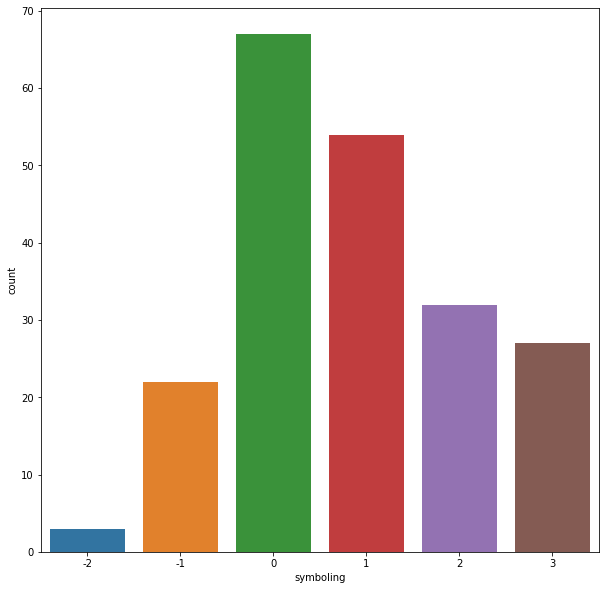

In [10]:
#explore symboling column
plt.figure(figsize = (10,10))
sns.countplot(cars_data['symboling'])

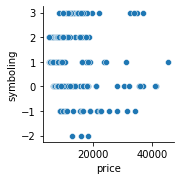

In [11]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

In [12]:
cars_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [13]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [14]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
cars_data = cars_data.drop(['CarName'], axis =1)

In [16]:
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [17]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [18]:
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [19]:
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [20]:
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [21]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [22]:
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [23]:
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [24]:
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [26]:
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

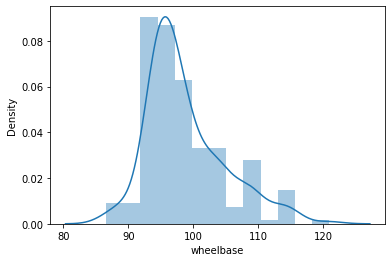

In [27]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [28]:
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

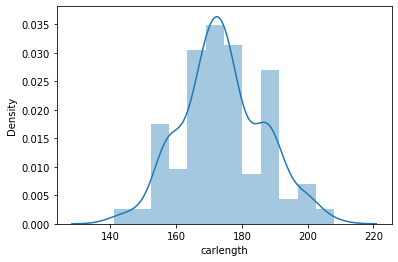

In [29]:
sns.distplot(cars_data['carlength'])
plt.show()

In [30]:
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [31]:
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [32]:
def convert_number(x):
    return x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [33]:
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [34]:
cars_data = cars_data.drop(['cylindernumber'], axis =1)#non significant column

In [35]:
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [36]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

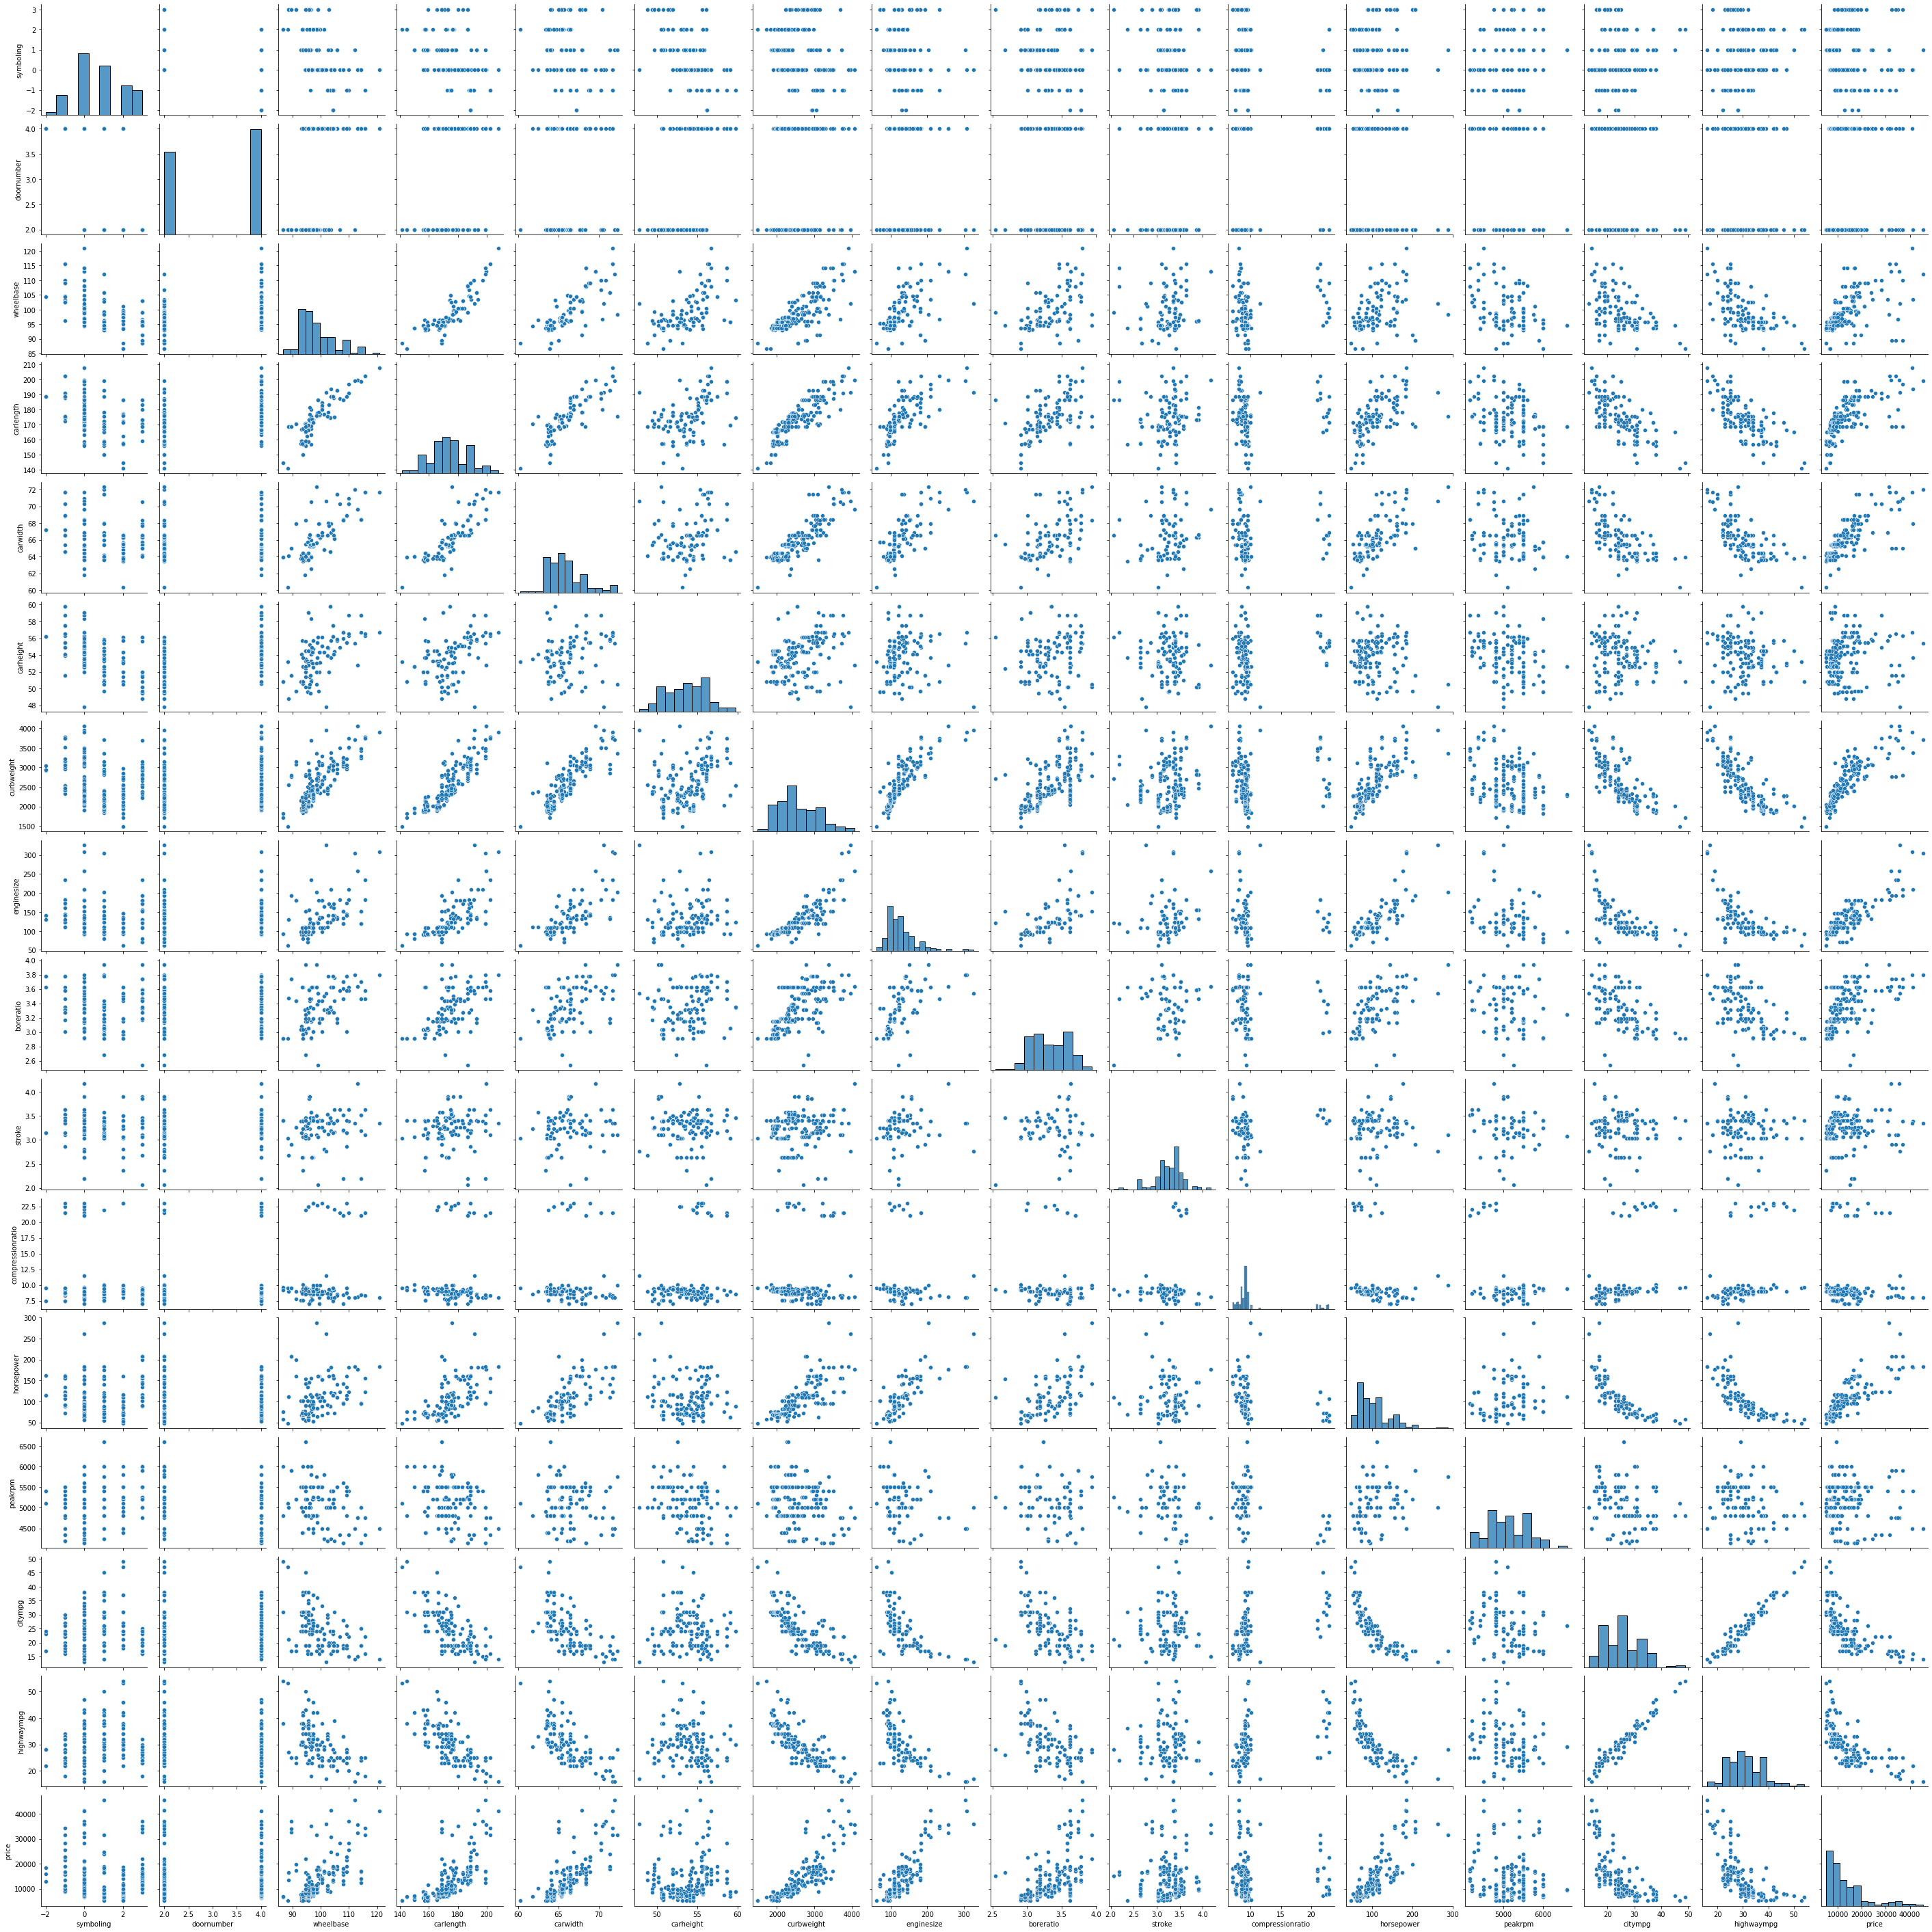

In [37]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

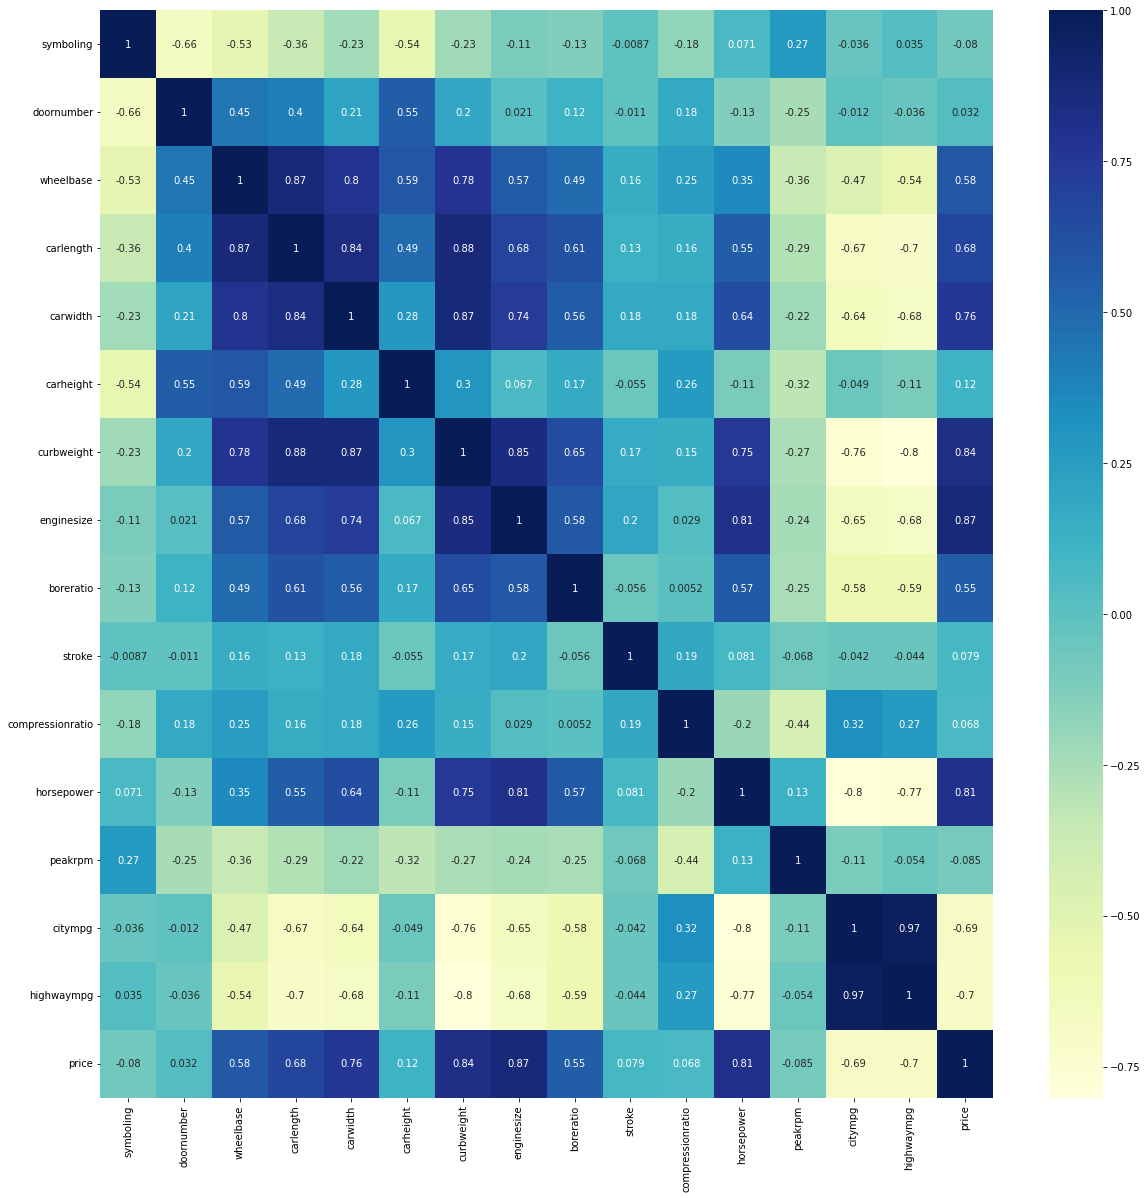

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [39]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

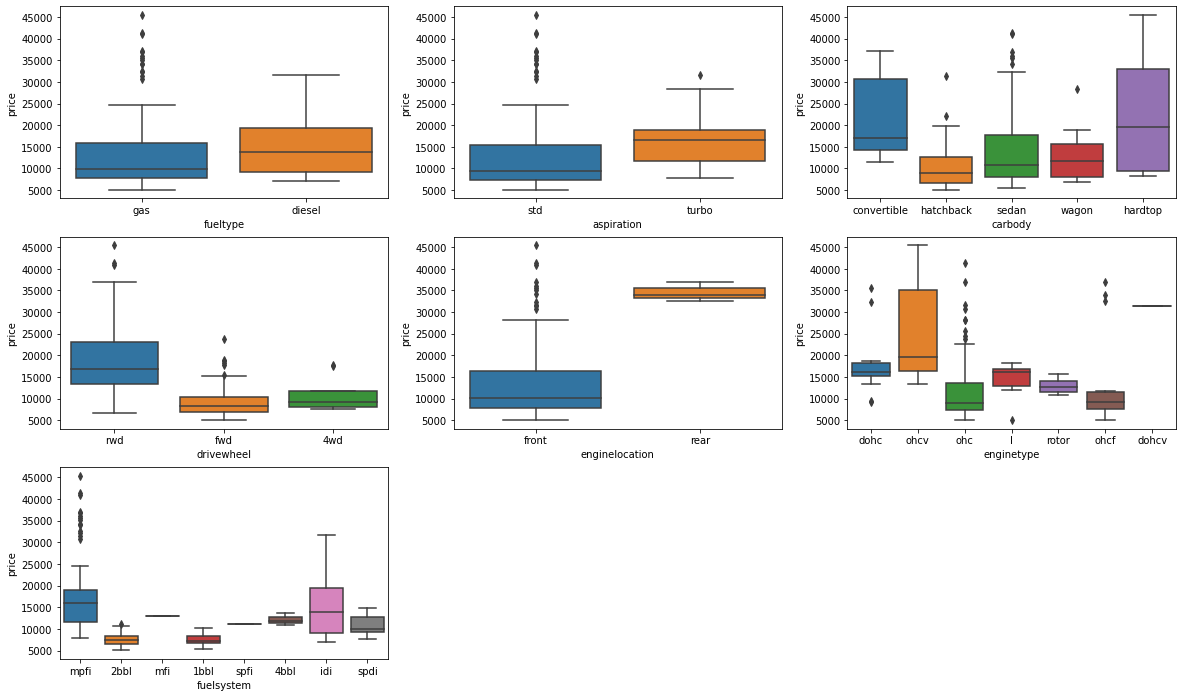

In [40]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

<AxesSubplot:xlabel='car_company', ylabel='price'>

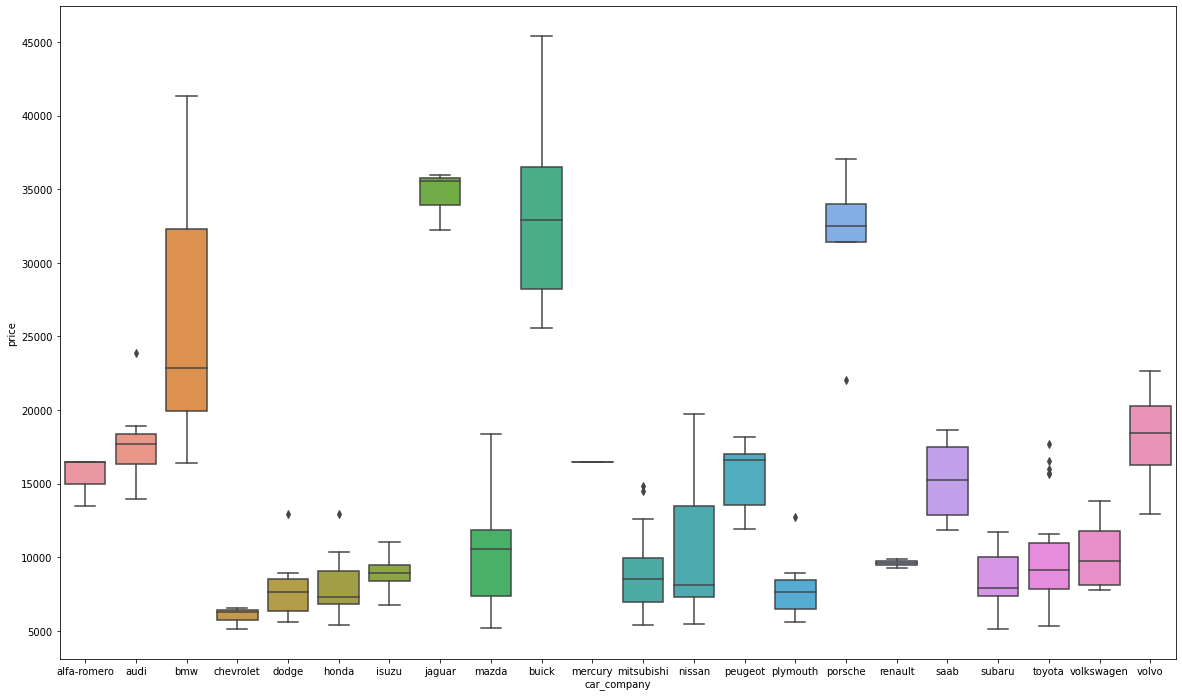

In [41]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

#### ---------Data preprocessing--------

In [42]:

cars_dummies = pd.get_dummies(categorical_cols)
cars_dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)

In [44]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [45]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   doornumber               205 non-null    int64  
 2   wheelbase                205 non-null    float64
 3   carlength                205 non-null    float64
 4   carwidth                 205 non-null    float64
 5   carheight                205 non-null    float64
 6   curbweight               205 non-null    int64  
 7   enginesize               205 non-null    int64  
 8   boreratio                205 non-null    float64
 9   stroke                   205 non-null    float64
 10  compressionratio         205 non-null    float64
 11  horsepower               205 non-null    int64  
 12  peakrpm                  205 non-null    int64  
 13  citympg                  205 non-null    int64  
 14  highwaympg               2

In [46]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.shape

(143, 67)

In [48]:
df_test.shape

(62, 67)

In [49]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [51]:
scaler = StandardScaler()

In [52]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [53]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.726623e-17,9.937661e-17,1.565182e-15,1.614870e-16,-4.074441e-15,5.341493e-16,-1.614870e-16,-6.211038e-17,-1.062087e-15,2.141255e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.663447e-01,9.948427e-03,6.399437e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,3.928914e-01,8.942829e-01,4.814173e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,4.923816e+00,2.432256e+00,2.953845e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### --------Model building----------

In [54]:
y_train = df_train.pop('price')
X_train = df_train

#### Model building using LinearRegression:

In [55]:
lr = LinearRegression()
model=lr.fit(X_train,y_train)

In [56]:
model.intercept_


-17103184180694.607

In [57]:
len(model.coef_)

66

In [58]:

df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [59]:
y_pred = model.predict(X_test)

In [60]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [61]:
mse

4.430416020688372e+22

In [62]:

r_squ = r2_score(y_test,y_pred)
r_squ

-3.829047511137639e+22